In [1]:
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
%pylab inline
a=pd.read_excel("C:/Users/user/Desktop/INTERNSHIP/SOLAR_DADRI/DATA/COMBINED/06.xlsx",Header='None')

a.set_index=pd.to_datetime(a['Date'])
a.columns
Date=list(a['Date'])
Values=list(a['Values'])
b=pd.DataFrame({'Date':Date,'Values':Values})
b['Date']=pd.to_datetime(b['Date'])
b.set_index(b['Date'],inplace='True')
del b
ts=pd.Series(Values,index=pd.to_datetime(Date))
a=ts['2017-06']
b=a['2017-06-15 00:00:00 ':]


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=96,center=False).mean()
    rolstd = timeseries.rolling(window=96,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

Populating the interactive namespace from numpy and matplotlib


Coefficients: [  9.11616140e-09  -6.96379245e-07  -1.02123687e-04   1.00227813e-02
  -1.73588865e-01   5.03513610e-01]


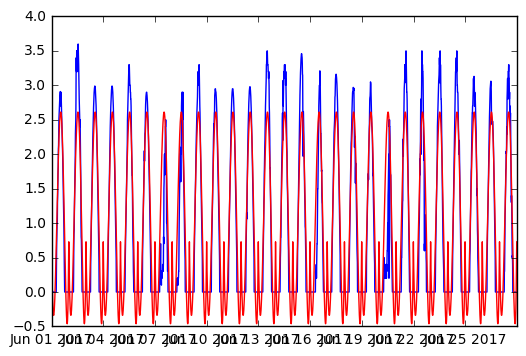

In [2]:

from pandas import Series
from matplotlib import pyplot
from numpy import polyfit
series = ts
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%96 for i in range(0, len(series))]
y = series.values
degree = 5
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
Curve=pd.Series(curve,index=pd.to_datetime(Date))
pyplot.plot(series)
pyplot.plot(Curve, color='red')
pyplot.show()

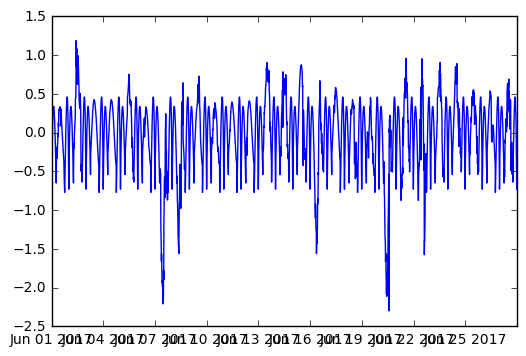

In [3]:
# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
	value = values[i] - curve[i]
	diff.append(value)
data=pd.Series(diff,index=pd.to_datetime(Date))
pyplot.plot(data)
pyplot.show()


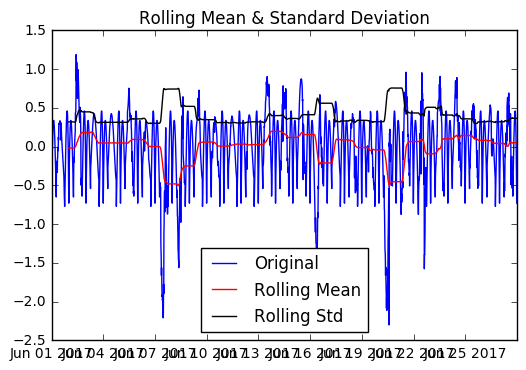

Results of Dickey-Fuller Test:
Test Statistic                -8.111624e+00
p-value                        1.221488e-12
#Lags Used                     2.800000e+01
Number of Observations Used    2.563000e+03
Critical Value (5%)           -2.862668e+00
Critical Value (1%)           -3.432904e+00
Critical Value (10%)          -2.567371e+00
dtype: float64


In [4]:
test_stationarity(data)

In [10]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

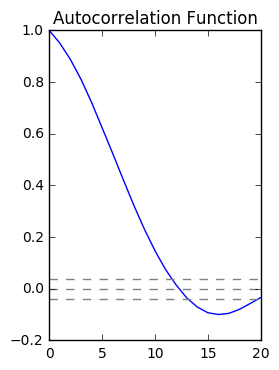

In [6]:
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

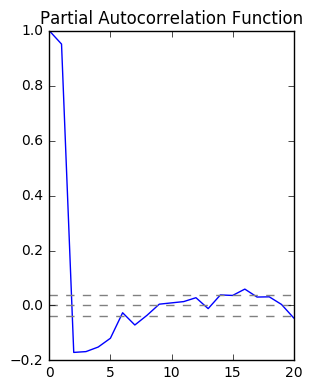

In [8]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

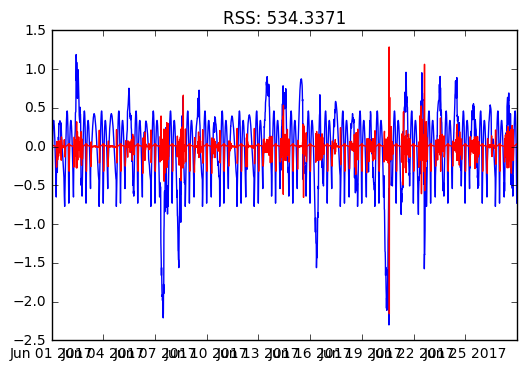

In [18]:
#AR model
model = ARIMA(data, order=(2, 2, 0))  
results_AR = model.fit(disp=-1)
plt.plot(data)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data)**2))

In [19]:
predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True)
print predictions_AR_diff

2017-06-01 00:30:00   -0.000152
2017-06-01 00:45:00    0.009538
2017-06-01 01:00:00    0.018498
2017-06-01 01:15:00    0.017859
2017-06-01 01:30:00    0.017205
2017-06-01 01:45:00    0.016540
2017-06-01 02:00:00    0.015862
2017-06-01 02:15:00    0.015175
2017-06-01 02:30:00    0.014478
2017-06-01 02:45:00    0.013772
2017-06-01 03:00:00    0.013060
2017-06-01 03:15:00    0.012341
2017-06-01 03:30:00    0.011618
2017-06-01 03:45:00    0.010891
2017-06-01 04:00:00    0.010160
2017-06-01 04:15:00    0.009428
2017-06-01 04:30:00    0.008696
2017-06-01 04:45:00    0.007964
2017-06-01 05:00:00    0.007233
2017-06-01 05:15:00    0.006505
2017-06-01 05:30:00    0.005781
2017-06-01 05:45:00    0.005061
2017-06-01 06:00:00    0.004347
2017-06-01 06:15:00    0.003640
2017-06-01 06:30:00    0.002941
2017-06-01 06:45:00   -0.264060
2017-06-01 07:00:00    0.005124
2017-06-01 07:15:00    0.065706
2017-06-01 07:30:00    0.066826
2017-06-01 07:45:00    0.032006
                         ...   
2017-06-

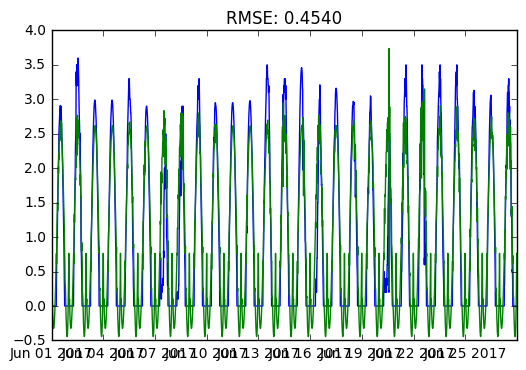

In [20]:
predictions_AR = predictions_AR_diff+Curve
plt.plot(ts)
plt.plot(predictions_AR)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_AR-ts)**2)/len(ts)))

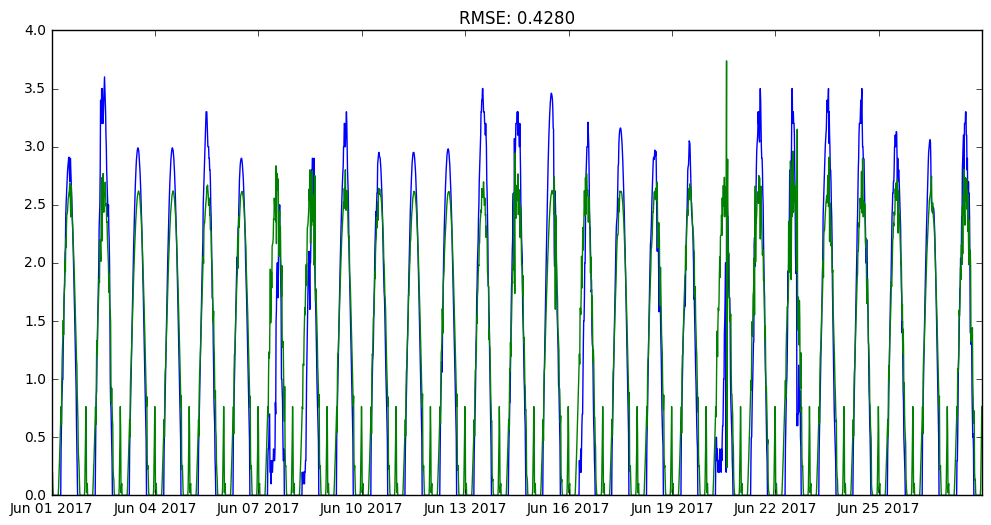

In [27]:
predictions_ARfin=predictions_AR.copy()
predictions_ARfin[predictions_ARfin<0]=0
predictions_ARfin.fillna(0)
plt.figure(figsize=(12,6))
plt.plot(ts)
plt.plot(predictions_ARfin)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARfin-ts)**2)/len(ts)))